In [1]:
import numpy as np

In [2]:
np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m,1) # column vector 
y = 4 + 3 * X + np.random.randn(m,1) # column vector

<Figure size 1200x800 with 0 Axes>

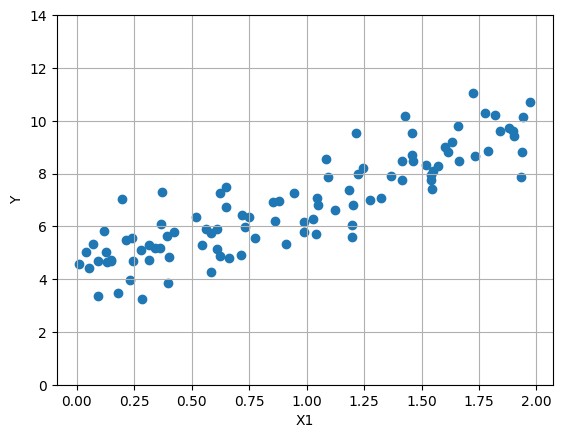

<Figure size 1200x800 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel('Y')
plt.xlabel('X1')
plt.yticks(np.arange(0,15,2))
plt.grid()
plt.figure(figsize=(12,8))

In [3]:
from sklearn.preprocessing import add_dummy_feature

In [4]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [26]:
X_new = np.array([[0],[2]])

In [27]:
X_new_b = add_dummy_feature(X_new) # add x0 = 1 for each instance

In [28]:
y_predict = X_new_b @ theta_best

In [29]:
y_predict

array([[4.21509616],
       [9.75532293]])

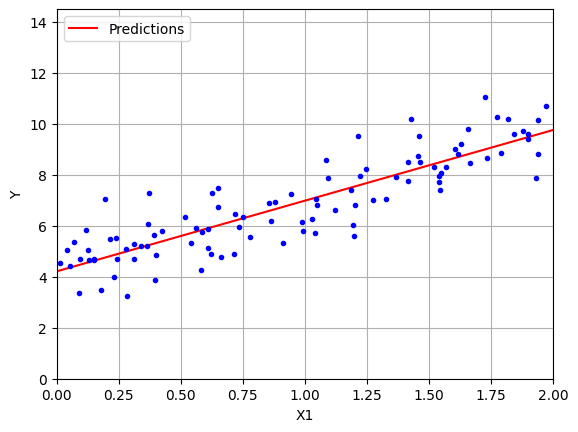

In [37]:
plt.plot(X_new,y_predict, "r-", label='Predictions')
plt.plot(X,y,"b.")
plt.ylabel('Y')
plt.ylim(0,14.5)
plt.xlabel('X1')
plt.xlim(0,2)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [43]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [44]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [45]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [46]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [51]:
np.linalg.svd(X_b)

SVDResult(U=array([[-8.51341424e-02,  6.16132489e-02, -8.96233597e-02, ...,
        -1.01302130e-01, -1.16727468e-01, -1.13563842e-01],
       [-1.45246051e-01, -1.23527170e-01, -9.95358962e-02, ...,
         2.25873105e-03,  1.36709232e-01,  1.09134404e-01],
       [-1.22427086e-01, -5.32463752e-02,  9.84685201e-01, ...,
        -8.30989388e-03,  9.42195632e-04, -9.55341209e-04],
       ...,
       [-9.06636945e-02,  4.45826201e-02, -7.24818749e-03, ...,
         9.90677854e-01, -1.20614338e-02, -1.14996256e-02],
       [-4.87105580e-02,  1.73795308e-01,  3.40620546e-03, ...,
        -1.06591304e-02,  9.70763352e-01, -2.54265328e-02],
       [-5.73148437e-02,  1.47294718e-01,  1.22106630e-03, ...,
        -1.03849245e-02, -2.57141351e-02,  9.77429775e-01]],
      shape=(100, 100)), S=array([14.37020392,  4.11961067]), Vh=array([[-0.66187141, -0.74961739],
       [ 0.74961739, -0.66187141]]))

In [54]:
# Gradient Descent
eta = 0.1 # Learning rate
n_epochs = 1000
m = len(X_b) # number of instances

In [57]:
np.random.seed(42) 
theta = np.random.randn(2,1) # Randomly initalized model parameters

In [58]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [59]:
theta

array([[4.21509616],
       [2.77011339]])